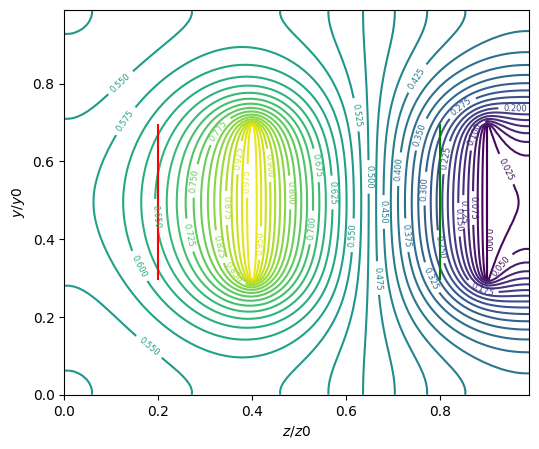

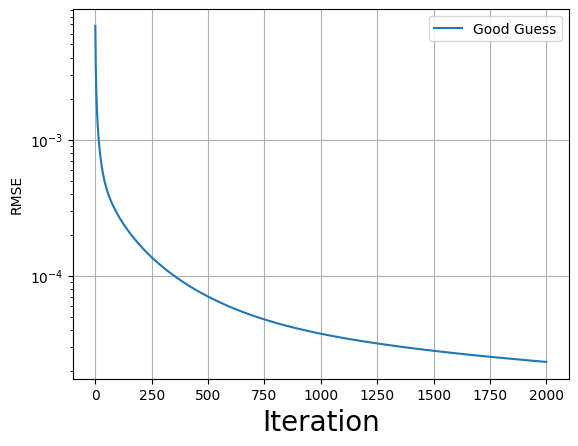

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(['science'.'notebook'])
from scipy.ndimage import convolve, generate_binary_structure

N = 100
grid = np.zeros((N,N,N))+0.5

grid[30:70,30:70,40] = 1
grid[30:70,30:70,90] = 0
mask_pos = grid==1
mask_neg = grid==0

yv, xv, zv = np.meshgrid(np.arange(N),np.arange(N),np.arange(N))
#grid = 1-zv/100

kern = generate_binary_structure(3,1).astype(float)/6
kern[1,1,1] = 0
kern

def neumann(a):
  a[0,:,:] = a[1,:,:]; a[-1,:,:] = a[-2,:,:]
  a[:,0,:] = a[:,1,:]; a[:,-1,:] = a[:,-2,:]
  a[:,:,0] = a[:,:,1]; a[:,:,-1] = a[:,:,-2]
  return a

err = []
iters = 2000
for i in range(iters):
  grid_updated = convolve(grid,kern, mode='constant')
  # Boundary conditions (neumann)
  grid_updated = neumann(grid_updated)
  # Boundary conditions (dirchlett)
  grid_updated[mask_pos] = 1
  grid_updated[mask_neg] = 0
  # See what error is between consecutive arrays
  err.append(np.mean((grid-grid_updated)**2))
  grid = grid_updated

slc = 40

plt.figure(figsize=(6,5))
CS = plt.contour(np.arange(100)/100, np.arange(100)/100, grid[slc], levels=40)
plt.clabel(CS, CS.levels, inline=True, fontsize=6)
plt.xlabel('$z/z 0$')
plt.ylabel('$y/y 0$')
plt.axvline(0.2, ymin=0.3, ymax=0.7, color='r')
plt.axvline(0.8, ymin=0.3, ymax=0.7, color='g')
plt.show()

plt.semilogy(np.sqrt(np.array(err)), label='Good Guess')
plt.legend()
plt.xlabel('Iteration', fontsize=20)
plt.ylabel(r'RMSE')
plt.grid()